# Homework4 Jingyi Fu
# UID:506088659

# 1 ISL Exercise 8.4.3 (10pts)

In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

$$E = 1 - \max_k (\hat p_{mk}).$$
$$G = \sum_{k=1}^K \hat p_{mk}(1 - \hat p_{mk})$$
$$D = - \sum_{k=1}^K \hat p_{mk} \log \hat p_{mk}$$

<AxesSubplot:xlabel='pm1'>

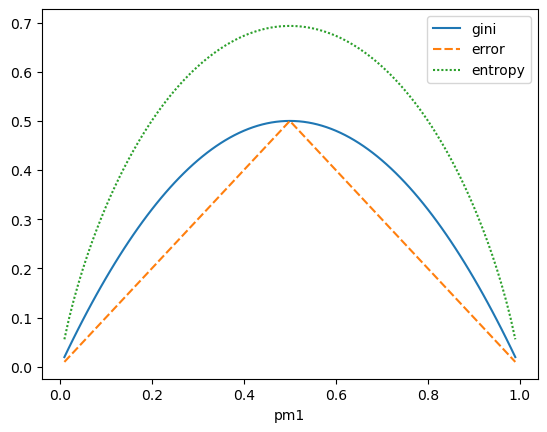

In [7]:
# pm1 & pm2
pm1 = np.arange(0.01, 1, 0.01)
pm2 = 1 - pm1

# Classification error
err=[]
for p in pm1:
    if 0.5 <= p:
        err += [1 - p]
    if p < 0.5:
        err += [p]
        
# Gini index
gini = (pm1 * (1 - pm1)) + (pm2 * (1 - pm2))

# Entropy
entropy = -((pm1 * np.log(pm1)) + (pm2 * np.log(pm2)))



# Plot against pm1
df = pd.DataFrame(np.stack([pm1, gini, err, entropy], axis=1), 
                  columns=['pm1', 'gini', 'error', 'entropy']).set_index('pm1')
sns.lineplot(data=df)

# 3 ISL Exercise 8.4.5 (10pts)

In [10]:
x = np.array([0.1,0.15,0.2,0.2,0.55,0.6,0.6,0.65,0.7, 0.75])

def majority_clf(votes):
    pro_votes = (votes > 0.5).sum()
    majority_is_pro = pro_votes > (len(votes) / 2) 
    return majority_is_pro, pro_votes

def avg_clf(votes):
    avg = np.mean(votes)
    return (avg > 0.5, avg)

print('By Majority[is red]: {}, votes_red={}'.format(*majority_clf(x)))
print('By Average[Is red]: {}, avg={}'.format(*avg_clf(x)))

By Majority[is red]: True, votes_red=6
By Average[Is red]: False, avg=0.45


# 4 ISL Lab 8.3. Boston data set (30pts)

In [11]:
import pandas as pd
import io
import requests

url = "https://raw.githubusercontent.com/ucla-econ-425t/2023winter/master/slides/data/Boston.csv"
s = requests.get(url).content
Boston = pd.read_csv(io.StringIO(s.decode('utf-8')), index_col = 0)
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,9.67,22.4
503,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,9.08,20.6
504,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,5.64,23.9
505,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,6.48,22.0


<Figure size 640x480 with 0 Axes>

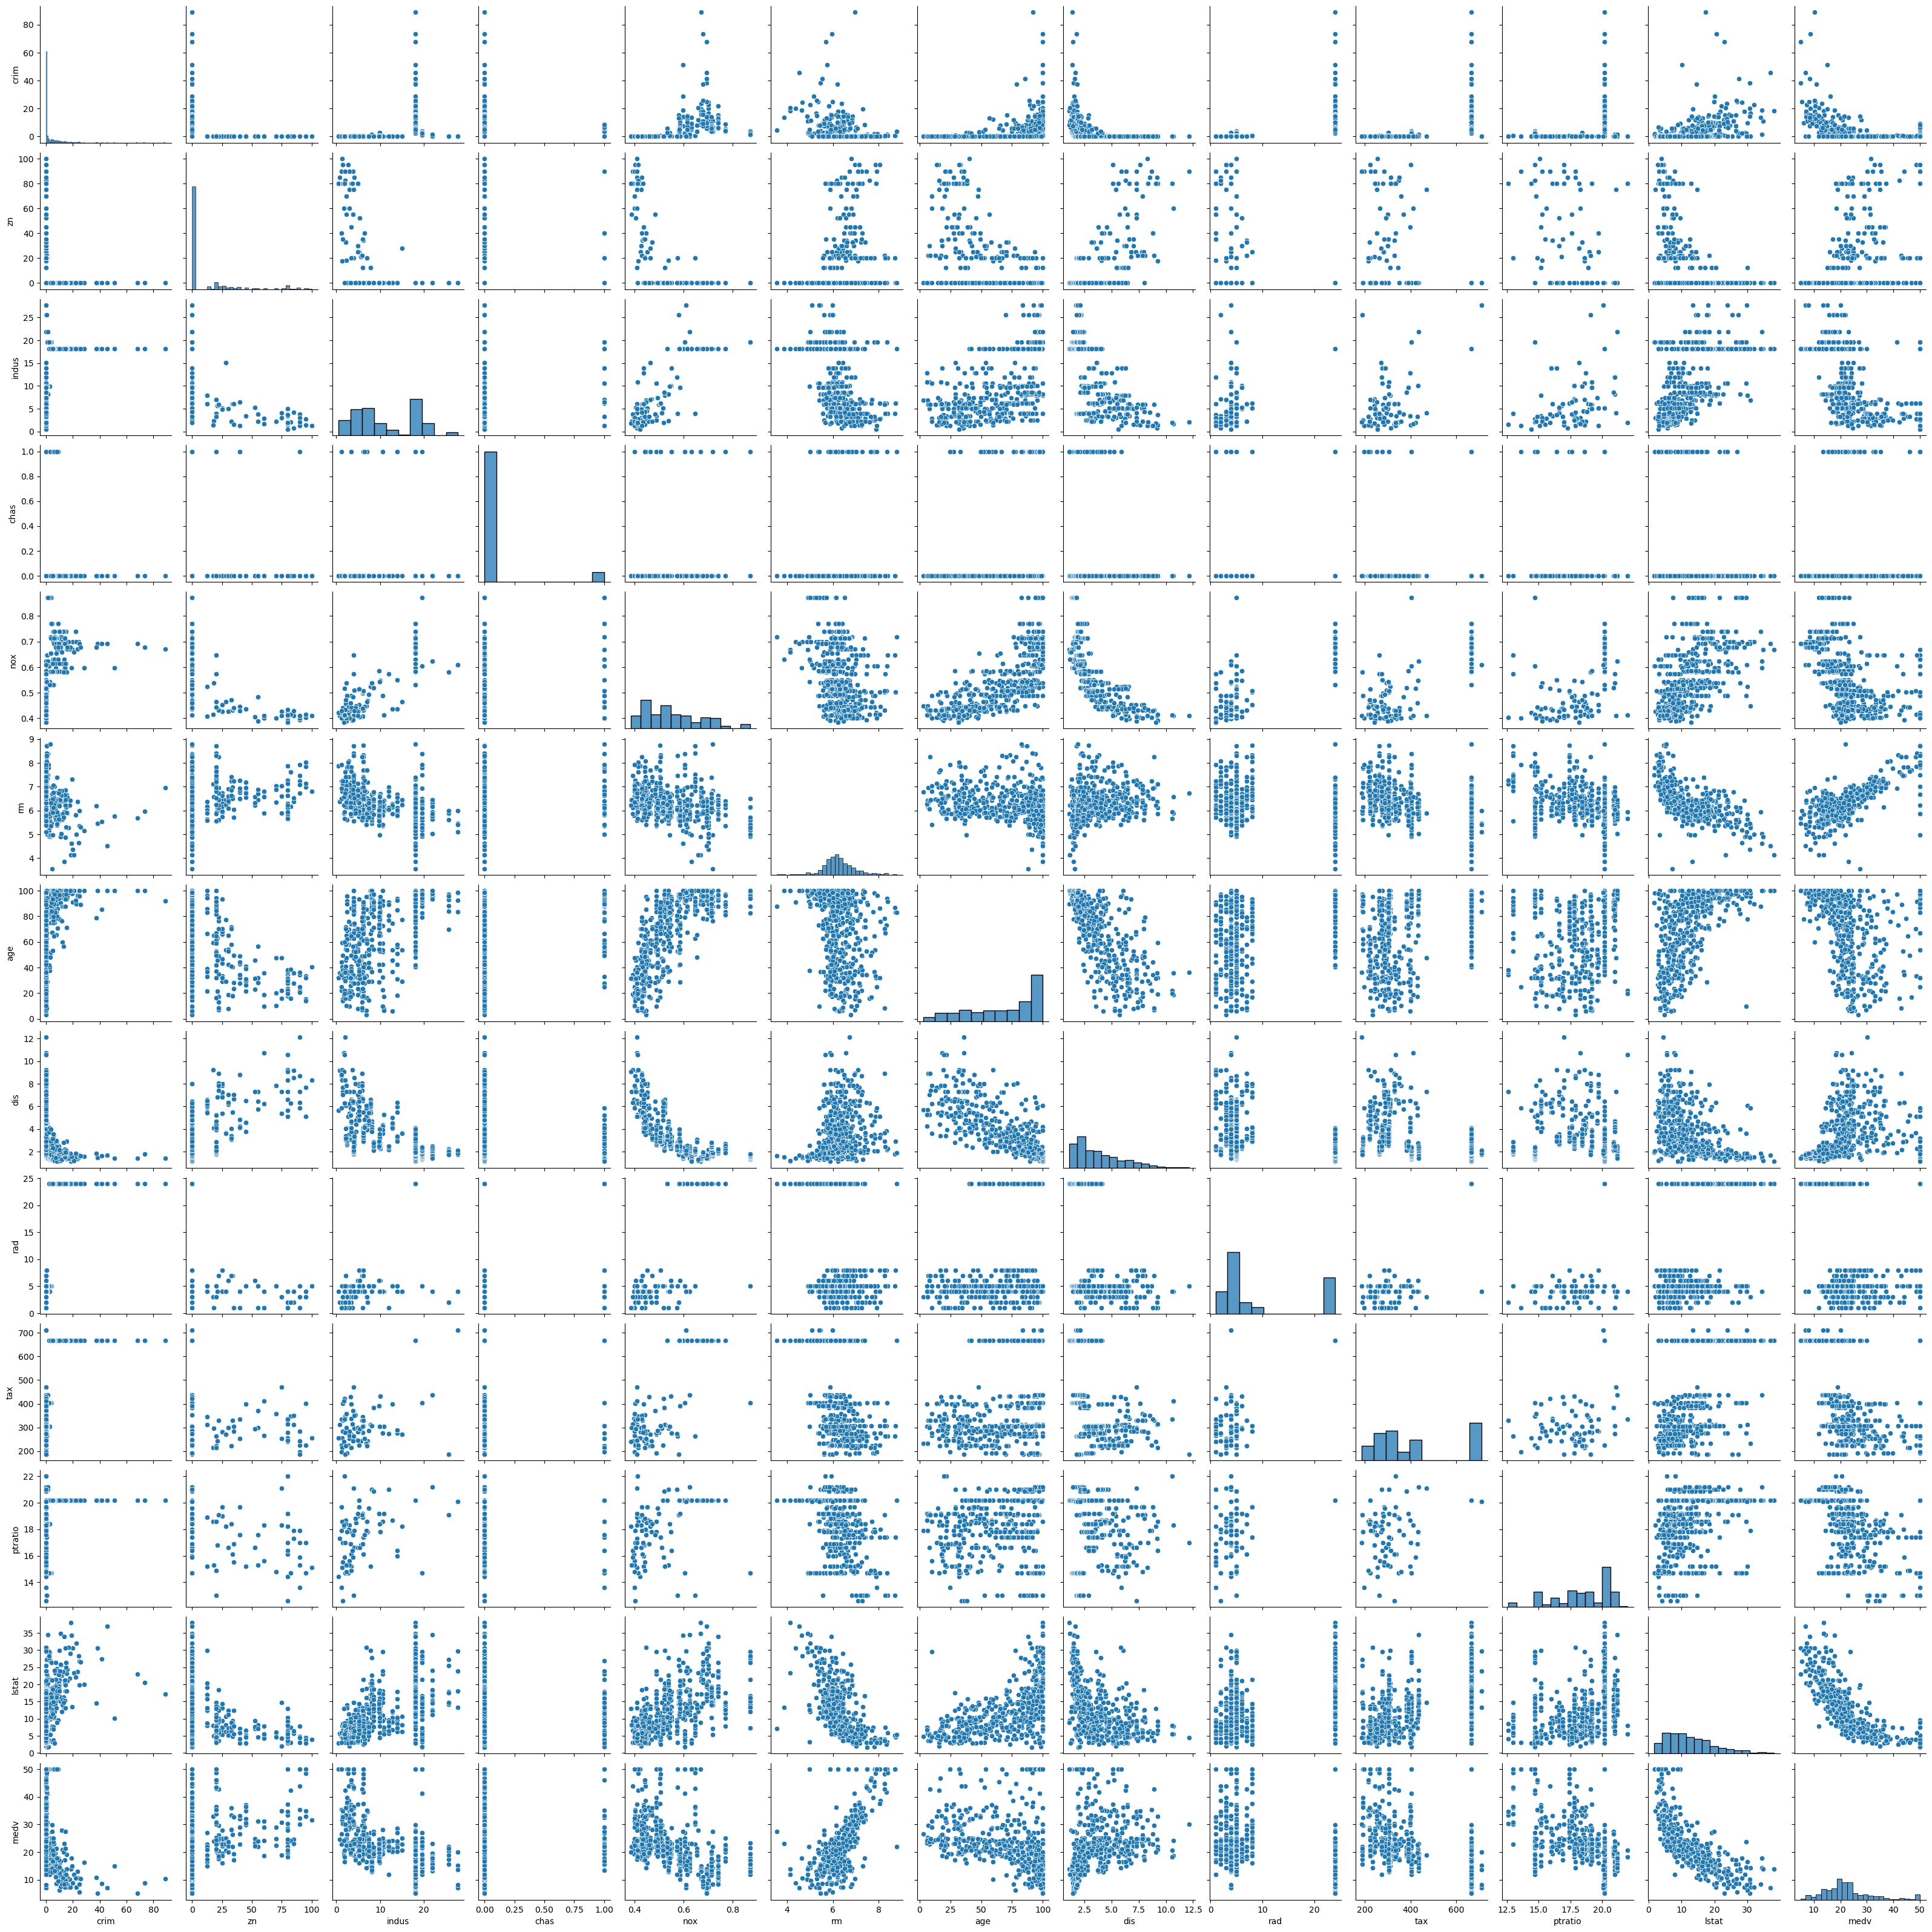

In [13]:
# Graphical summaries
plt.figure()
sns.pairplot(data = Boston);
plt.show()

In [15]:
Boston.dropna(inplace = True)
Boston.shape

(506, 13)

In [16]:
from sklearn.model_selection import train_test_split

Boston_other, Boston_test = train_test_split(
  Boston, 
  train_size = 0.5,
  random_state = 425, # seed
  )
Boston_test.shape

(253, 13)

In [18]:
Boston_other.shape

(253, 13)

In [29]:
# Non-test X and y
X_other = Boston_other.drop('medv', axis=1)
y_other = np.log(Boston_other.medv)
# Test X and y
X_test = Boston_test.drop('medv', axis=1)
y_test = np.log(Boston_test.medv)
X_other.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,lstat
242,0.10612,30.0,4.93,0,0.428,6.095,65.1,6.3361,6,300,16.6,12.40
422,7.02259,0.0,18.10,0,0.718,6.006,95.3,1.8746,24,666,20.2,15.70
125,0.09849,0.0,25.65,0,0.581,5.879,95.8,2.0063,2,188,19.1,17.58
500,0.17783,0.0,9.69,0,0.585,5.569,73.5,2.3999,6,391,19.2,15.10
463,6.65492,0.0,18.10,0,0.713,6.317,83.0,2.7344,24,666,20.2,13.99


# Random forest

In [20]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_mod =  RandomForestRegressor(
  # Number of trees
  n_estimators = 100, 
  criterion = 'squared_error',
  # Number of features to use in each split
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

In [21]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", rf_mod)
  ])
pipe

Pipeline(steps=[('model',
                 RandomForestRegressor(max_features='sqrt', oob_score=True,
                                       random_state=425))])

In [22]:
# Tuning grid
# Tune hyper-parameter(s)
B_grid = [50, 100, 150, 200, 250, 300]
m_grid = ['sqrt', 'log2', 1.0] # max_features = 1.0 uses all features
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
tuned_parameters  

{'model__n_estimators': [50, 100, 150, 200, 250, 300],
 'model__max_features': ['sqrt', 'log2', 1.0]}

In [23]:
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

In [24]:
# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        RandomForestRegressor(max_features='sqrt',
                                                              oob_score=True,
                                                              random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 'log2', 1.0],
                         'model__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='neg_root_mean_squared_error')

<Figure size 640x480 with 0 Axes>

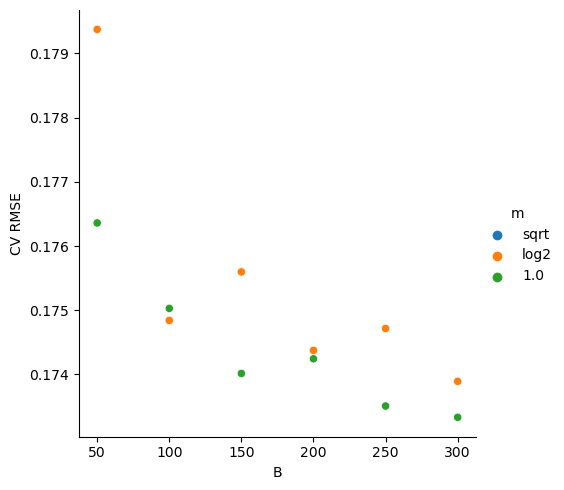

In [25]:
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "rmse": -search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "rmse",
  hue = "m",
  ).set(
    xlabel = "B",
    ylabel = "CV RMSE"
);
plt.show()

In [26]:
-search.best_score_

0.17333180903439868

In [27]:
# finalize the model
search.best_estimator_

Pipeline(steps=[('model',
                 RandomForestRegressor(max_features=1.0, n_estimators=300,
                                       oob_score=True, random_state=425))])

<Figure size 640x480 with 0 Axes>

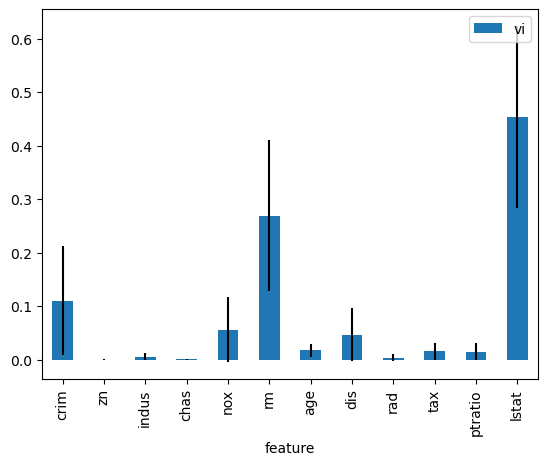

In [30]:
features = ["crim","zn","indus","chas","nox","rm","age","dis","rad","tax","ptratio","lstat"]

vi_df = pd.DataFrame({
  "feature": features,
  "vi": search.best_estimator_['model'].feature_importances_,
  "vi_std": np.std([tree.feature_importances_ for tree in search.best_estimator_['model'].estimators_], axis = 0)
  })

plt.figure()
vi_df.plot.bar(x = "feature", y = "vi", yerr = "vi_std")
plt.xticks(rotation = 90);
plt.show()

In [31]:
from sklearn.metrics import mean_squared_error

mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

0.1544188130988914

# Regression tree

In [32]:
# Regression tree
from sklearn.tree import DecisionTreeRegressor, plot_tree

regtree_mod = DecisionTreeRegressor(random_state = 425)

In [33]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", regtree_mod)
  ])
pipe

Pipeline(steps=[('model', DecisionTreeRegressor(random_state=425))])

In [34]:
# Tune hyper-parameter(s)
ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.1, num = 100)
tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }
tuned_parameters  

{'model__ccp_alpha': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
        0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
        0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
        0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
        0.02020202, 0.02121212, 0.02222222, 0.02323232, 0.02424242,
        0.02525253, 0.02626263, 0.02727273, 0.02828283, 0.02929293,
        0.03030303, 0.03131313, 0.03232323, 0.03333333, 0.03434343,
        0.03535354, 0.03636364, 0.03737374, 0.03838384, 0.03939394,
        0.04040404, 0.04141414, 0.04242424, 0.04343434, 0.04444444,
        0.04545455, 0.04646465, 0.04747475, 0.04848485, 0.04949495,
        0.05050505, 0.05151515, 0.05252525, 0.05353535, 0.05454545,
        0.05555556, 0.05656566, 0.05757576, 0.05858586, 0.05959596,
        0.06060606, 0.06161616, 0.06262626, 0.06363636, 0.06464646,
        0.06565657, 0.06666667, 0.06767677, 0.06868687, 0.06969697,
        0.07070707, 0.071717

In [35]:
# CV
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

In [36]:
# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=6,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeRegressor(random_state=425))]),
             param_grid={'model__ccp_alpha': array([0.        , 0.0010101 , 0.0020202 , 0.0030303 , 0.0040404 ,
       0.00505051, 0.00606061, 0.00707071, 0.00808081, 0.00909091,
       0.01010101, 0.01111111, 0.01212121, 0.01313131, 0.01414141,
       0.01515152, 0.01616162, 0.01717172, 0.01818182, 0.01919192,
       0.020202...
       0.07070707, 0.07171717, 0.07272727, 0.07373737, 0.07474747,
       0.07575758, 0.07676768, 0.07777778, 0.07878788, 0.07979798,
       0.08080808, 0.08181818, 0.08282828, 0.08383838, 0.08484848,
       0.08585859, 0.08686869, 0.08787879, 0.08888889, 0.08989899,
       0.09090909, 0.09191919, 0.09292929, 0.09393939, 0.09494949,
       0.0959596 , 0.0969697 , 0.0979798 , 0.0989899 , 0.1       ])},
             scoring='neg_root_mean_squared_error')

<Figure size 640x480 with 0 Axes>

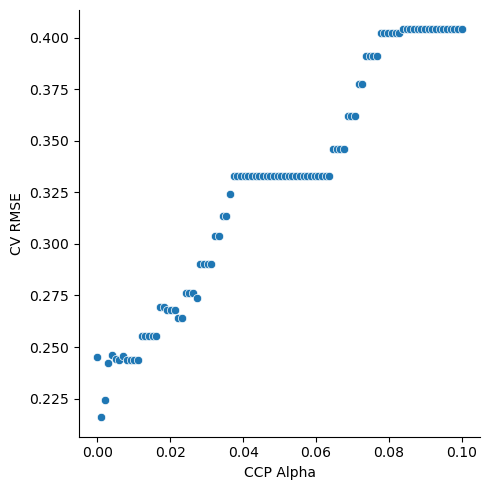

In [37]:
cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "rmse": -search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "ccp_alpha",
  y = "rmse"
  ).set(
    xlabel = "CCP Alpha",
    ylabel = "CV RMSE"
);
plt.show()

In [38]:
-search.best_score_

0.21592247388188332

In [39]:
# finalize the model
search.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeRegressor(ccp_alpha=0.00101010101010101,
                                       random_state=425))])

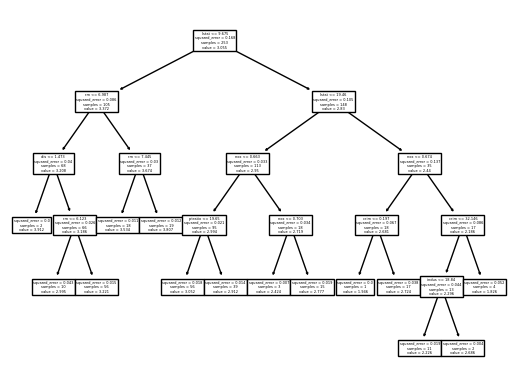

In [40]:
plt.figure()
plot_tree(
  search.best_estimator_['model'],
  feature_names = features
  );
plt.show()

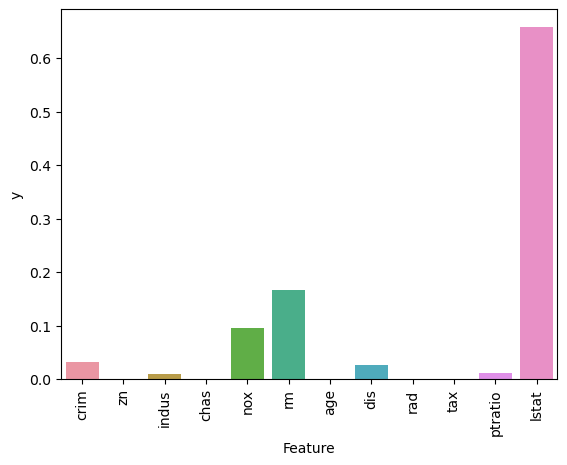

In [43]:
vi_df = pd.DataFrame({
  "feature": features,
  "vi": search.best_estimator_['model'].feature_importances_
  })

plt.figure()
sns.barplot(
  data = vi_df,
  x = "feature",
  y = "vi"
  ).set(
    xlabel = "Feature",
    ylabel = "y"
);
plt.xticks(rotation = 90);
plt.show()

In [44]:
from sklearn.metrics import mean_squared_error

mean_squared_error(
  y_test, 
  search.best_estimator_.predict(X_test), 
  squared = False
  )

0.2154150078075615

# Boosting for Prediction

In [67]:
# Boosting for Prediction
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

bst_mod =  AdaBoostRegressor()

In [68]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", bst_mod)
  ])
pipe

Pipeline(steps=[('model', AdaBoostRegressor())])

In [69]:
# Tune hyper-parameter(s)
d_grid = [
  DecisionTreeRegressor(max_depth = 1),
  DecisionTreeRegressor(max_depth = 2),
  DecisionTreeRegressor(max_depth = 3),
  DecisionTreeRegressor(max_depth = 4)
  ]
B_grid = [50, 100, 150, 200, 250, 300, 350, 400]
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters = {
  "model__estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
tuned_parameters  

{'model__estimator': [DecisionTreeRegressor(max_depth=1),
  DecisionTreeRegressor(max_depth=2),
  DecisionTreeRegressor(max_depth=3),
  DecisionTreeRegressor(max_depth=4)],
 'model__n_estimators': [50, 100, 150, 200, 250, 300, 350, 400],
 'model__learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0]}

In [70]:
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 6
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "neg_root_mean_squared_error",
  # Refit the best model on the whole data set
  refit = True
  )

In [56]:
# Create an AdaBoost regressor with 100 estimators
boosting = AdaBoostRegressor(n_estimators=100)
# Fit the AdaBoost regressor to the training data
boosting.fit(X_other, y_other)
# Predict on the test set
y_pred_boosting = boosting.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error, r2_score
mse_boosting = mean_squared_error(y_test, y_pred_boosting)
r2_boosting = r2_score(y_test, y_pred_boosting)

print("Boosting performance:")
print("MSE = ", mse_boosting)
print("R^2 = ", r2_boosting)

Boosting performance:
MSE =  0.028898851270427073
R^2 =  0.8241066575247775


# 5 ISL Lab 8.3 Carseats data set (30pts)

In [3]:
Carseats = pd.read_csv('./Carseats.csv')
Carseats

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [4]:
# Numerical summaries
Carseats.describe(include = 'all')

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400,400.000000,400.000000,400,400
unique,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,Medium,NaN,NaN,Yes,Yes
freq,NaN,NaN,NaN,NaN,NaN,NaN,219,NaN,NaN,282,258
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,NaN,53.322500,13.900000,NaN,NaN
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,NaN,16.200297,2.620528,NaN,NaN
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,NaN,25.000000,10.000000,NaN,NaN
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,NaN,39.750000,12.000000,NaN,NaN
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,NaN,54.500000,14.000000,NaN,NaN
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,NaN,66.000000,16.000000,NaN,NaN


<Figure size 640x480 with 0 Axes>

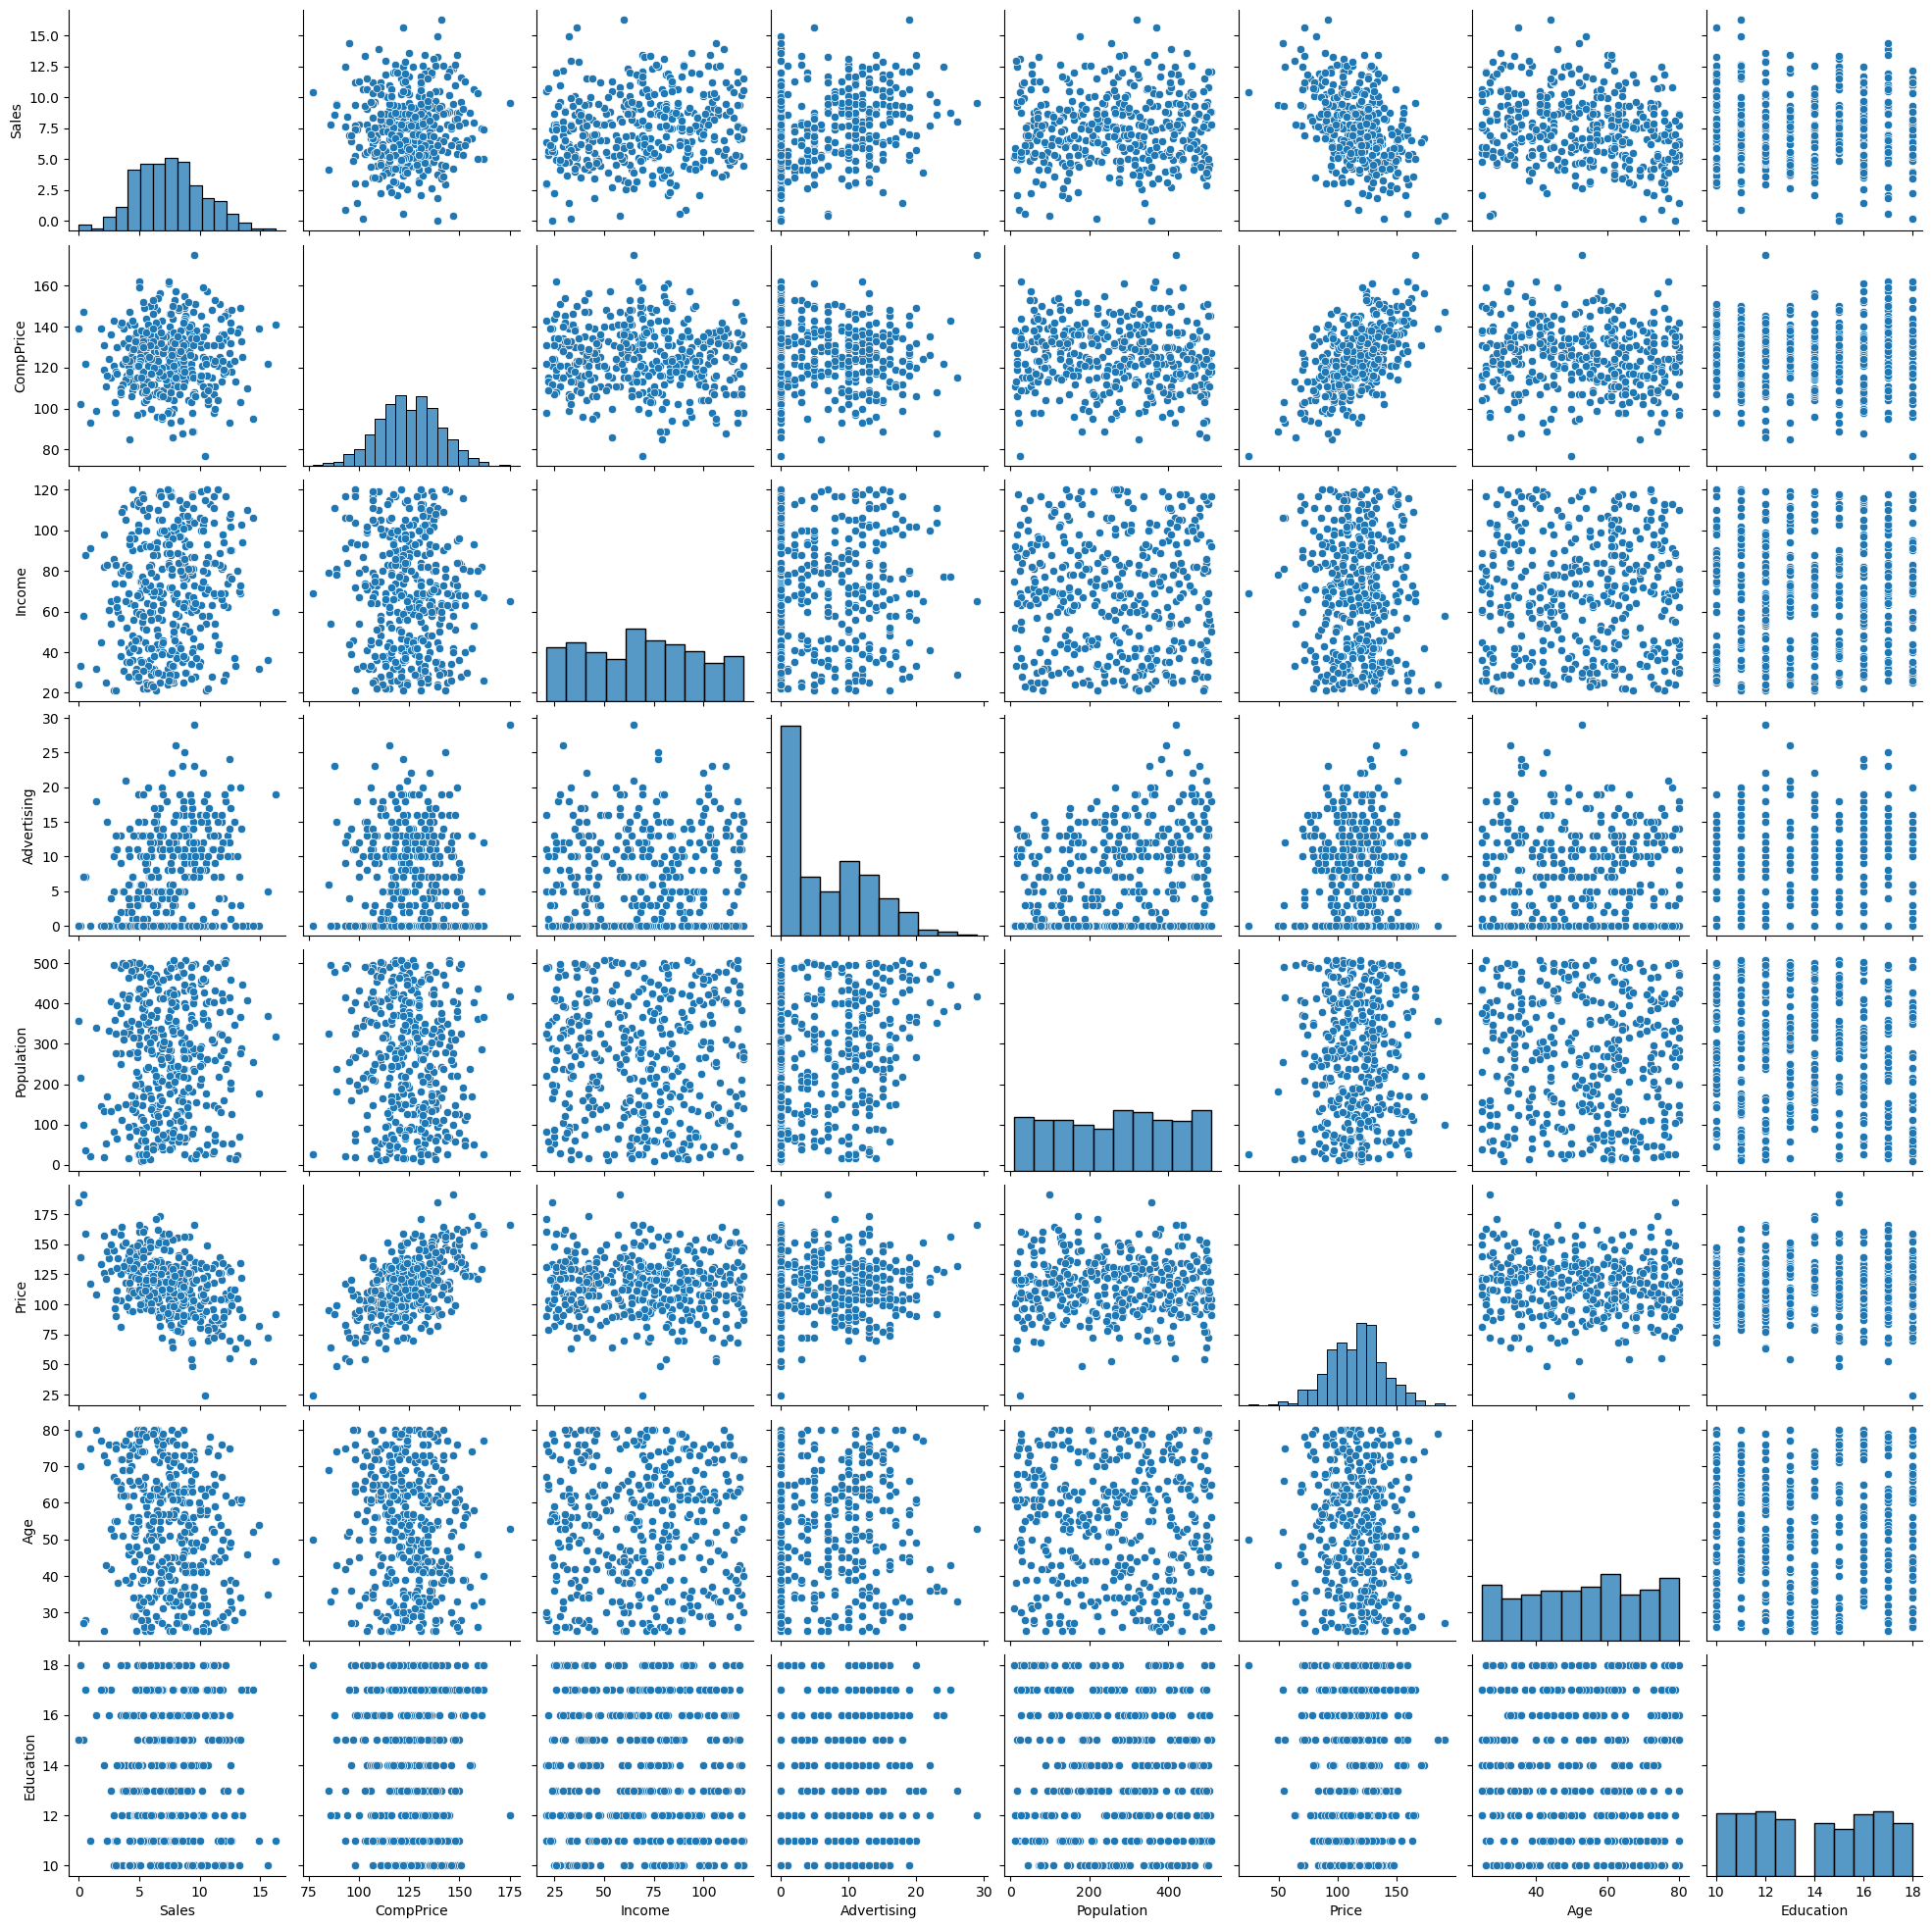

In [73]:
# Graphical summaries
plt.figure()
sns.pairplot(data = Carseats);
plt.show()

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# US HIGH URBAN dummy variables
Carseats['ShelveLoc'] = pd.Categorical(Carseats['ShelveLoc'], categories=['Bad', 'Medium', 'Good'], ordered=True).codes
Carseats['Urban'] = pd.get_dummies(Carseats['Urban'], drop_first=True)
Carseats['US'] = pd.get_dummies(Carseats['US'], drop_first=True)
Carseats['High'] = (Carseats['Sales'] > 8).astype(int)

Carseats.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120,0,42,17,1,1,1
1,11.22,111,48,16,260,83,2,65,10,1,1,1
2,10.06,113,35,10,269,80,1,59,12,1,1,1
3,7.40,117,100,4,466,97,1,55,14,1,1,0
4,4.15,141,64,3,340,128,0,38,13,1,0,0


In [7]:
from sklearn.model_selection import train_test_split

X = Carseats.drop(['Sales', 'High'], axis=1)
y = Carseats['High']
X_other, X_test, y_other, y_test = train_test_split(X, y, test_size=0.75, random_state=1)
X_other.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
359,130,62,11,396,130,0,66,14,1,1
20,125,90,2,367,131,1,35,18,1,1
353,107,67,12,430,92,1,35,12,0,1
75,88,111,23,480,92,0,36,16,0,1
200,144,92,0,349,146,1,62,12,0,0


In [8]:
# How many NaNs
Carseats.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
High           0
dtype: int64

In [9]:
from pydataset import data
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier

In [89]:
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree

classtree_mod = DecisionTreeClassifier(
  criterion = 'gini',
  random_state = 425
  )

In [91]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", classtree_mod)
  ])
pipe

Pipeline(steps=[('model', DecisionTreeClassifier(random_state=425))])

In [92]:
# tuning grid
# Tune hyper-parameter(s)
ccp_alpha_grid = np.linspace(start = 0.0, stop = 0.05, num = 100)
tuned_parameters = {
  "model__ccp_alpha": ccp_alpha_grid
  }
tuned_parameters  

{'model__ccp_alpha': array([0.        , 0.00050505, 0.0010101 , 0.00151515, 0.0020202 ,
        0.00252525, 0.0030303 , 0.00353535, 0.0040404 , 0.00454545,
        0.00505051, 0.00555556, 0.00606061, 0.00656566, 0.00707071,
        0.00757576, 0.00808081, 0.00858586, 0.00909091, 0.00959596,
        0.01010101, 0.01060606, 0.01111111, 0.01161616, 0.01212121,
        0.01262626, 0.01313131, 0.01363636, 0.01414141, 0.01464646,
        0.01515152, 0.01565657, 0.01616162, 0.01666667, 0.01717172,
        0.01767677, 0.01818182, 0.01868687, 0.01919192, 0.01969697,
        0.02020202, 0.02070707, 0.02121212, 0.02171717, 0.02222222,
        0.02272727, 0.02323232, 0.02373737, 0.02424242, 0.02474747,
        0.02525253, 0.02575758, 0.02626263, 0.02676768, 0.02727273,
        0.02777778, 0.02828283, 0.02878788, 0.02929293, 0.02979798,
        0.03030303, 0.03080808, 0.03131313, 0.03181818, 0.03232323,
        0.03282828, 0.03333333, 0.03383838, 0.03434343, 0.03484848,
        0.03535354, 0.035858

In [93]:
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

In [94]:
# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        DecisionTreeClassifier(random_state=425))]),
             param_grid={'model__ccp_alpha': array([0.        , 0.00050505, 0.0010101 , 0.00151515, 0.0020202 ,
       0.00252525, 0.0030303 , 0.00353535, 0.0040404 , 0.00454545,
       0.00505051, 0.00555556, 0.00606061, 0.00656566, 0.00707071,
       0.00757576, 0.00808081, 0.00858586, 0.00909091, 0.00959596,
       0.01010...
       0.03282828, 0.03333333, 0.03383838, 0.03434343, 0.03484848,
       0.03535354, 0.03585859, 0.03636364, 0.03686869, 0.03737374,
       0.03787879, 0.03838384, 0.03888889, 0.03939394, 0.03989899,
       0.04040404, 0.04090909, 0.04141414, 0.04191919, 0.04242424,
       0.04292929, 0.04343434, 0.04393939, 0.04444444, 0.04494949,
       0.04545455, 0.0459596 , 0.04646465, 0.0469697 , 0.04747475,
       0.0479798 , 0.04848485, 0.0489899 , 0.04949495, 0.05      ])},
             scoring='roc_auc')

<Figure size 640x480 with 0 Axes>

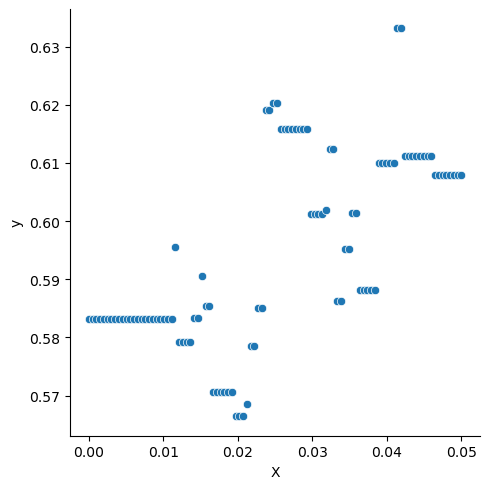

In [95]:
cv_res = pd.DataFrame({
  "ccp_alpha": np.array(search.cv_results_["param_model__ccp_alpha"]),
  "auc": search.cv_results_["mean_test_score"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "ccp_alpha",
  y = "auc"
  ).set(
    xlabel = "X",
    ylabel = "y"
);
plt.show()

In [96]:
search.best_score_

0.6331387362637362

In [97]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(
  y_other,
  search.best_estimator_.predict(X_other)
  )

0.73

In [98]:
# finalize the model
search.best_estimator_

Pipeline(steps=[('model',
                 DecisionTreeClassifier(ccp_alpha=0.04141414141414142,
                                        random_state=425))])

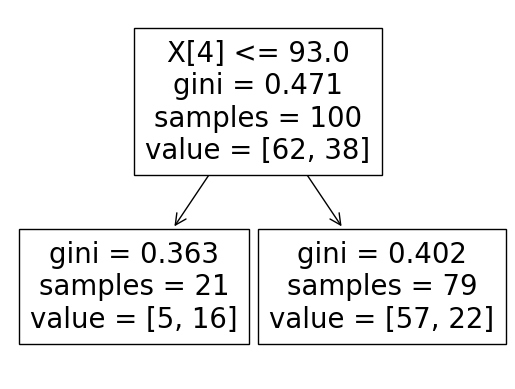

In [99]:
# plot the tree
plt.figure()
plot_tree(
  search.best_estimator_['model'],
  #feature_names = features
  );
plt.show()

In [103]:
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.5925013683634374

In [104]:
accuracy_score(
  y_test, 
  search.best_estimator_.predict(X_test)
  )

0.6466666666666666

# Random Forest for Classification

In [105]:
# Random Forest for Classification
from sklearn.ensemble import RandomForestClassifier

rf_mod = RandomForestClassifier(
  # Number of trees
  n_estimators = 100, 
  criterion = 'gini',
  # Number of features to use in each split
  max_features = 'sqrt',
  oob_score = True,
  random_state = 425
  )

In [106]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", rf_mod)
  ])
pipe

Pipeline(steps=[('model',
                 RandomForestClassifier(max_features='sqrt', oob_score=True,
                                        random_state=425))])

In [107]:
# Tune hyper-parameter(s)
B_grid = [50, 100, 150, 200, 250, 300]
m_grid = ['sqrt', 'log2', 1.0] # max_features = 1.0 uses all features
tuned_parameters = {
  "model__n_estimators": B_grid,
  "model__max_features": m_grid
  }
tuned_parameters 

{'model__n_estimators': [50, 100, 150, 200, 250, 300],
 'model__max_features': ['sqrt', 'log2', 1.0]}

In [108]:
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

In [109]:
# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('model',
                                        RandomForestClassifier(max_features='sqrt',
                                                               oob_score=True,
                                                               random_state=425))]),
             param_grid={'model__max_features': ['sqrt', 'log2', 1.0],
                         'model__n_estimators': [50, 100, 150, 200, 250, 300]},
             scoring='roc_auc')

<Figure size 640x480 with 0 Axes>

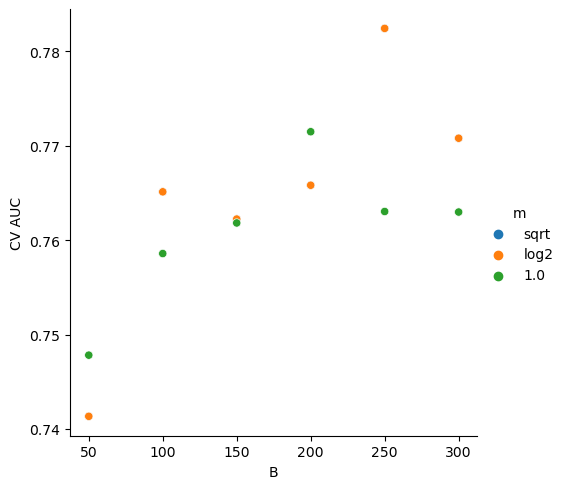

In [110]:
cv_res = pd.DataFrame({
  "B": np.array(search.cv_results_["param_model__n_estimators"]),
  "auc": search.cv_results_["mean_test_score"],
  "m": search.cv_results_["param_model__max_features"]
  })

plt.figure()
sns.relplot(
  # kind = "line",
  data = cv_res,
  x = "B",
  y = "auc",
  hue = "m"
  ).set(
    xlabel = "B",
    ylabel = "CV AUC"
);
plt.show()

In [111]:
search.best_score_

0.7824175824175825

In [112]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(
  y_other,
  search.best_estimator_.predict(X_other)
  )

1.0

In [113]:
# finalize the model
search.best_estimator_

Pipeline(steps=[('model',
                 RandomForestClassifier(max_features='sqrt', n_estimators=250,
                                        oob_score=True, random_state=425))])

In [114]:
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.7296113847837986

In [115]:
accuracy_score(
  y_test,
  search.best_estimator_.predict(X_test)
  )

0.6666666666666666

# Boosting for Classification

In [10]:
# Boosting for Classification
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

bst_mod = AdaBoostClassifier()

In [11]:
from sklearn.pipeline import Pipeline

pipe = Pipeline(steps = [
  ("model", bst_mod)
  ])
pipe

Pipeline(steps=[('model', AdaBoostClassifier())])

In [12]:
# Tune hyper-parameter(s)
d_grid = [
  DecisionTreeClassifier(max_depth = 1),
  DecisionTreeClassifier(max_depth = 2),
  DecisionTreeClassifier(max_depth = 3),
  DecisionTreeClassifier(max_depth = 4)
  ]
B_grid = np.linspace(10, 100, 10).astype(int)
lambda_grid = [0.2, 0.4, 0.6, 0.8, 1.0]
tuned_parameters = {
  "model__base_estimator": d_grid,
  "model__n_estimators": B_grid,
  "model__learning_rate": lambda_grid
  }
tuned_parameters 

{'model__base_estimator': [DecisionTreeClassifier(max_depth=1),
  DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=4)],
 'model__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 'model__learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0]}

In [13]:
from sklearn.model_selection import GridSearchCV

# Set up CV
n_folds = 5
search = GridSearchCV(
  pipe,
  tuned_parameters,
  cv = n_folds, 
  scoring = "roc_auc",
  # Refit the best model on the whole data set
  refit = True
  )

In [14]:
# Fit CV
search.fit(X_other, y_other)

GridSearchCV(cv=5, estimator=Pipeline(steps=[('model', AdaBoostClassifier())]),
             param_grid={'model__base_estimator': [DecisionTreeClassifier(max_depth=1),
                                                   DecisionTreeClassifier(max_depth=2),
                                                   DecisionTreeClassifier(max_depth=3),
                                                   DecisionTreeClassifier(max_depth=4)],
                         'model__learning_rate': [0.2, 0.4, 0.6, 0.8, 1.0],
                         'model__n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='roc_auc')

In [15]:
search.best_score_

0.8780448717948717

In [16]:
from sklearn.metrics import accuracy_score, roc_auc_score

accuracy_score(
  y_other,
  search.best_estimator_.predict(X_other)
  )

1.0

In [17]:
roc_auc_score(
  y_test,
  search.best_estimator_.predict_proba(X_test)[:, 1]
  )

0.8219759168035031

In [18]:
accuracy_score(
  y_test,
  search.best_estimator_.predict(X_test)
  )

0.76

In [129]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(n_estimators=100, max_depth=3, random_state=1)
boost.fit(X_other, y_other)
y_pred = boost.predict(X_test)
print("Boosting accuracy:", accuracy_score(y_test, y_pred))

Boosting accuracy: 0.6733333333333333
